In [5]:
#!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
#!unzip jena_climate_2009_2016.csv.zip

In [6]:
filename = 'jena_climate_2009_2016.csv'

with open(filename) as f:
    data = f.read()

    lines = data.split('\n')
    header = lines[0].split(',')
    lines = lines[1:]
    print(header)
    print(len(lines))

for line in lines[:10]:
    print(line)

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451
01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30
01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.10
01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.60
01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.00
01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.30
01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.70
01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.80,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.50
01.01.2009 01:20:00,996.50,-7.62,265.

In [7]:
import numpy as np
n_lines = len(lines)
n_headers = len(header)
temperature = np.zeros((n_lines,))
raw_data = np.zeros((n_lines, n_headers - 1))

for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]] # 1: to skip the date time column
    temperature[i] = values[1]
    raw_data[i,] = values

print(temperature[:3])
print(raw_data[:3, :3])

[-8.02 -8.41 -8.51]
[[996.52  -8.02 265.4 ]
 [996.57  -8.41 265.01]
 [996.53  -8.51 264.91]]


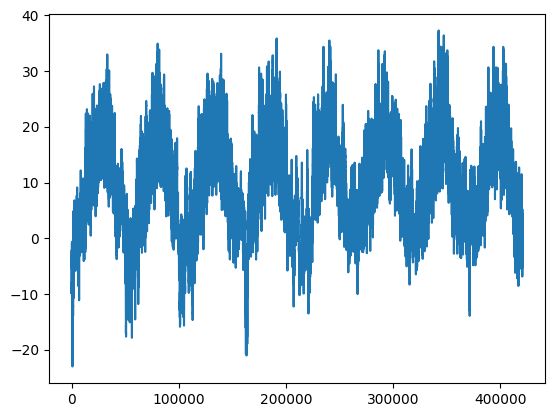

In [8]:
from matplotlib import pyplot as plt
plt.plot(range(n_lines), temperature)

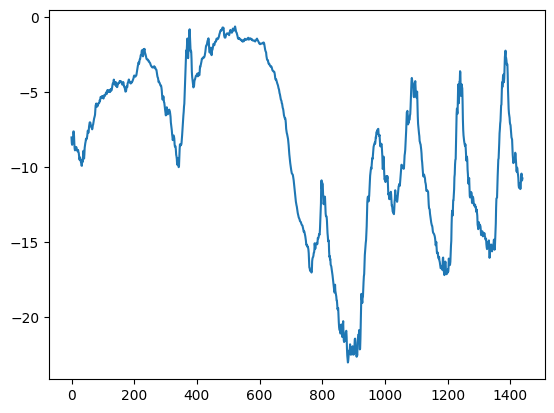

In [9]:
plt.plot(range(1440), temperature[:1440])

In [10]:
n_train = int(0.5 * n_lines)
n_val = int(0.25 * n_lines)
n_test = n_lines - n_train - n_val
print(n_train, n_val, n_test)

210225 105112 105114


In [11]:
print(raw_data[:3,:3])
mean = raw_data[:n_train].mean(axis=0)
std = raw_data[:n_train].std(axis=0)
z = (raw_data - mean) / std
print(z[:n_train].mean(axis=0), z[:n_train].std(axis=0))

[[996.52  -8.02 265.4 ]
 [996.57  -8.41 265.01]
 [996.53  -8.51 264.91]]
[ 2.41448143e-12 -3.04937772e-15  6.68831382e-13 -1.47390162e-14
  3.51971409e-15  5.17726056e-15 -1.97806893e-14 -1.56825520e-14
  3.62590596e-14  3.44193167e-15 -2.11724873e-13  1.60843651e-14
 -5.38064190e-14 -2.19450964e-15] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [12]:
import keras

sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

train_dataset = keras.utils.timeseries_dataset_from_array(
    z[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=n_train
)

val_dataset = keras.utils.timeseries_dataset_from_array(
    z[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=n_train,
    end_index=n_train + n_val
)

test_dataset = keras.utils.timeseries_dataset_from_array(
    z[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=n_train + n_val
)

2023-09-18 15:13:12.030472: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-18 15:13:12.049111: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-18 15:13:12.049612: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-18 15:13:12.508332: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-09-18 15:13:13.043556: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Do

In [13]:
for samples, targets in train_dataset:
    print('batch samples shape: ', samples.shape)
    print('batch targets shape: ', targets.shape)
    break

batch samples shape:  (256, 120, 14)
batch targets shape:  (256,)


In [14]:
def evaluate_naive_method(dataset):
    total_abs_err = 0
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1] * std[1] + mean[1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen

print(evaluate_naive_method(train_dataset), evaluate_naive_method(val_dataset), evaluate_naive_method(test_dataset))

2.691643827770379 2.4417326002413833 2.622035888818065


In [15]:
from tensorflow import keras
from tensorflow.keras import layers, activations, optimizers, losses, metrics, callbacks

inputs = layers.Input(shape=(sequence_length, z.shape[-1]))
x = layers.Flatten()(inputs)
x = layers.Dense(16, activation=activations.relu)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
callback_list = [
    callbacks.ModelCheckpoint('jena_dense', save_best_only=True)
]
model.compile(optimizer=optimizers.RMSprop(), loss=losses.mse, metrics=[metrics.mae])
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callback_list)

model = keras.models.load_model('jena_dense')
print(model.evaluate(test_dataset))


Epoch 1/10
795/819 [============================>.] - ETA: 0s - loss: 12.5716 - mean_absolute_error: 2.7352INFO:tensorflow:Assets written to: jena_dense/assets


INFO:tensorflow:Assets written to: jena_dense/assets


819/819 [==============================] - 4s 4ms/step - loss: 12.4762 - mean_absolute_error: 2.7253 - val_loss: 11.2997 - val_mean_absolute_error: 2.6525
Epoch 2/10
807/819 [============================>.] - ETA: 0s - loss: 8.9444 - mean_absolute_error: 2.3467INFO:tensorflow:Assets written to: jena_dense/assets


INFO:tensorflow:Assets written to: jena_dense/assets


819/819 [==============================] - 3s 4ms/step - loss: 8.9415 - mean_absolute_error: 2.3463 - val_loss: 10.2291 - val_mean_absolute_error: 2.5124
Epoch 3/10
819/819 [==============================] - 3s 4ms/step - loss: 8.1440 - mean_absolute_error: 2.2445 - val_loss: 12.6775 - val_mean_absolute_error: 2.8204
Epoch 4/10
819/819 [==============================] - 3s 4ms/step - loss: 7.7031 - mean_absolute_error: 2.1839 - val_loss: 11.2698 - val_mean_absolute_error: 2.6491
Epoch 5/10
819/819 [==============================] - 3s 4ms/step - loss: 7.3584 - mean_absolute_error: 2.1352 - val_loss: 11.8571 - val_mean_absolute_error: 2.7176
Epoch 6/10
819/819 [==============================] - 3s 4ms/step - loss: 7.1239 - mean_absolute_error: 2.1010 - val_loss: 10.5280 - val_mean_absolute_error: 2.5447
Epoch 7/10
819/819 [==============================] - 3s 4ms/step - loss: 6.9370 - mean_absolute_error: 2.0752 - val_loss: 11.1395 - val_mean_absolute_error: 2.6206
Epoch 8/10
819/819 [=

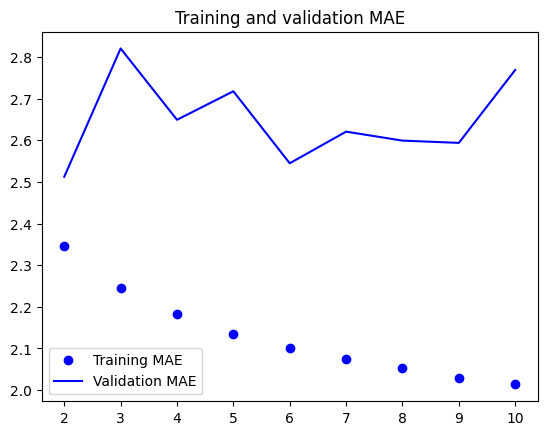

In [16]:
import matplotlib.pyplot as plt

loss = history.history['mean_absolute_error']
val_loss = history.history['val_mean_absolute_error']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs[1:], loss[1:], 'bo', label='Training MAE')
plt.plot(epochs[1:], val_loss[1:], 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()
plt.show()


In [17]:
inputs = layers.Input(shape=(sequence_length, z.shape[-1]))
x = layers.Conv1D(filters=8, kernel_size=24, activation=activations.relu)(inputs)
x = layers.MaxPooling1D(pool_size=2)(x)
x = layers.Conv1D(filters=8, kernel_size=12, activation=activations.relu)(x)
x = layers.MaxPooling1D(pool_size=2)(x)
x = layers.Conv1D(filters=8, kernel_size=6, activation=activations.relu)(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs=inputs, outputs=outputs)

callback_list = [
    callbacks.ModelCheckpoint('jena_conv', save_best_only=True)
]
model.compile(optimizer=optimizers.RMSprop(), loss=losses.mse, metrics=[metrics.mae])

history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callback_list)

model = keras.models.load_model('jena_conv')
print(model.evaluate(test_dataset))


Epoch 1/10
814/819 [============================>.] - ETA: 0s - loss: 23.6796 - mean_absolute_error: 3.8011INFO:tensorflow:Assets written to: jena_conv/assets


INFO:tensorflow:Assets written to: jena_conv/assets


819/819 [==============================] - 6s 7ms/step - loss: 23.6452 - mean_absolute_error: 3.7984 - val_loss: 17.8742 - val_mean_absolute_error: 3.3833
Epoch 2/10
816/819 [============================>.] - ETA: 0s - loss: 16.6277 - mean_absolute_error: 3.2312INFO:tensorflow:Assets written to: jena_conv/assets


INFO:tensorflow:Assets written to: jena_conv/assets


819/819 [==============================] - 6s 7ms/step - loss: 16.6197 - mean_absolute_error: 3.2303 - val_loss: 14.7056 - val_mean_absolute_error: 3.0136
Epoch 3/10
819/819 [==============================] - 5s 7ms/step - loss: 14.8780 - mean_absolute_error: 3.0672 - val_loss: 16.6154 - val_mean_absolute_error: 3.1826
Epoch 4/10
819/819 [==============================] - 6s 7ms/step - loss: 14.0148 - mean_absolute_error: 2.9745 - val_loss: 14.9588 - val_mean_absolute_error: 3.0218
Epoch 5/10
819/819 [==============================] - ETA: 0s - loss: 13.3704 - mean_absolute_error: 2.9027INFO:tensorflow:Assets written to: jena_conv/assets


INFO:tensorflow:Assets written to: jena_conv/assets


819/819 [==============================] - 6s 7ms/step - loss: 13.3704 - mean_absolute_error: 2.9027 - val_loss: 13.5401 - val_mean_absolute_error: 2.8850
Epoch 6/10
819/819 [==============================] - 5s 7ms/step - loss: 12.8310 - mean_absolute_error: 2.8406 - val_loss: 17.4171 - val_mean_absolute_error: 3.2945
Epoch 7/10
817/819 [============================>.] - ETA: 0s - loss: 12.3999 - mean_absolute_error: 2.7902INFO:tensorflow:Assets written to: jena_conv/assets


INFO:tensorflow:Assets written to: jena_conv/assets


819/819 [==============================] - 6s 7ms/step - loss: 12.3963 - mean_absolute_error: 2.7898 - val_loss: 13.1720 - val_mean_absolute_error: 2.8491
Epoch 8/10
819/819 [==============================] - 6s 7ms/step - loss: 11.9887 - mean_absolute_error: 2.7433 - val_loss: 15.4051 - val_mean_absolute_error: 3.0631
Epoch 9/10
819/819 [==============================] - 6s 7ms/step - loss: 11.6645 - mean_absolute_error: 2.7031 - val_loss: 13.3800 - val_mean_absolute_error: 2.8441
Epoch 10/10
405/405 [==============================] - 1s 3ms/step - loss: 14.4128 - mean_absolute_error: 3.0065
[14.412827491760254, 3.0064759254455566]


In [18]:
inputs = layers.Input(shape=(sequence_length, z.shape[-1]))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs=inputs, outputs=outputs)

callback_list = [
    callbacks.ModelCheckpoint('jena_lstm', save_best_only=True)
]
model.compile(optimizer=optimizers.RMSprop(), loss=losses.mse, metrics=[metrics.mae])
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callback_list)
model = keras.models.load_model('jena_lstm')
print(model.evaluate(test_dataset))

Epoch 1/10
817/819 [============================>.] - ETA: 0s - loss: 48.7385 - mean_absolute_error: 5.1149INFO:tensorflow:Assets written to: jena_lstm/assets


INFO:tensorflow:Assets written to: jena_lstm/assets


819/819 [==============================] - 16s 18ms/step - loss: 48.6809 - mean_absolute_error: 5.1112 - val_loss: 14.0883 - val_mean_absolute_error: 2.8292
Epoch 2/10
818/819 [============================>.] - ETA: 0s - loss: 11.2657 - mean_absolute_error: 2.5934INFO:tensorflow:Assets written to: jena_lstm/assets


INFO:tensorflow:Assets written to: jena_lstm/assets


819/819 [==============================] - 15s 18ms/step - loss: 11.2644 - mean_absolute_error: 2.5933 - val_loss: 9.7436 - val_mean_absolute_error: 2.4514
Epoch 3/10
819/819 [==============================] - ETA: 0s - loss: 9.6417 - mean_absolute_error: 2.4226INFO:tensorflow:Assets written to: jena_lstm/assets


INFO:tensorflow:Assets written to: jena_lstm/assets


819/819 [==============================] - 15s 18ms/step - loss: 9.6417 - mean_absolute_error: 2.4226 - val_loss: 9.2769 - val_mean_absolute_error: 2.3784
Epoch 4/10
819/819 [==============================] - 13s 16ms/step - loss: 9.0344 - mean_absolute_error: 2.3478 - val_loss: 9.6241 - val_mean_absolute_error: 2.4324
Epoch 5/10
819/819 [==============================] - 13s 16ms/step - loss: 8.7096 - mean_absolute_error: 2.3066 - val_loss: 9.7452 - val_mean_absolute_error: 2.4484
Epoch 6/10
819/819 [==============================] - 13s 16ms/step - loss: 8.4974 - mean_absolute_error: 2.2778 - val_loss: 10.8844 - val_mean_absolute_error: 2.5735
Epoch 7/10
819/819 [==============================] - 13s 16ms/step - loss: 8.3203 - mean_absolute_error: 2.2567 - val_loss: 9.9691 - val_mean_absolute_error: 2.4669
Epoch 8/10
819/819 [==============================] - 13s 16ms/step - loss: 8.1428 - mean_absolute_error: 2.2336 - val_loss: 9.8040 - val_mean_absolute_error: 2.4585
Epoch 9/10
819

In [19]:
state_t = 0

n_steps = 100
in_features = 32
out_features = 64

inputs = np.random.random((n_steps, in_features))
state_t = np.zeros((out_features,))

W = np.random.random((out_features, in_features))
U = np.random.random((out_features, out_features))
b = np.random.random((out_features,))

successive_outputs = []

for input_t in inputs:
    output_t = np.tanh(np.matmul(W, input_t) + np.matmul(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t

final_output_seq = np.stack(successive_outputs, axis=0)

In [20]:
n_features = 14
inputs = layers.Input(shape=(None, n_features))
outputs = layers.SimpleRNN(16)(inputs)

In [21]:
n_features = 14
n_steps = 120
inputs = layers.Input(shape=(n_steps, n_features))
outputs = layers.SimpleRNN(16, return_sequences=False)(inputs)
print(outputs.shape)

outputs = layers.SimpleRNN(16, return_sequences=True)(inputs)
print(outputs.shape)

(None, 16)
(None, 120, 16)


In [22]:
inputs = layers.Input(shape=(n_steps, n_features))
x = layers.SimpleRNN(16, return_sequences=True)(inputs)
x = layers.SimpleRNN(16, return_sequences=True)(x)
outputs = layers.SimpleRNN(16)(x)

In [26]:
inputs = layers.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(units=32, recurrent_dropout=0.25)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callback_list = [
    callbacks.ModelCheckpoint('jena_lstm_dropout', save_best_only=True)
]

model.compile(optimizer=optimizers.RMSprop(), loss=losses.mse, metrics=[metrics.mae])
history = model.fit(train_dataset, epochs=50, validation_data=val_dataset, callbacks=callback_list)

model = keras.models.load_model('jena_lstm_dropout')
print(model.evaluate(test_dataset))

Epoch 1/50
818/819 [============================>.] - ETA: 0s - loss: 26.5994 - mean_absolute_error: 3.8212INFO:tensorflow:Assets written to: jena_lstm_dropout/assets


INFO:tensorflow:Assets written to: jena_lstm_dropout/assets


819/819 [==============================] - 26s 31ms/step - loss: 26.5942 - mean_absolute_error: 3.8209 - val_loss: 10.1199 - val_mean_absolute_error: 2.4792
Epoch 2/50
817/819 [============================>.] - ETA: 0s - loss: 14.9331 - mean_absolute_error: 3.0017INFO:tensorflow:Assets written to: jena_lstm_dropout/assets


INFO:tensorflow:Assets written to: jena_lstm_dropout/assets


819/819 [==============================] - 25s 31ms/step - loss: 14.9294 - mean_absolute_error: 3.0013 - val_loss: 9.7437 - val_mean_absolute_error: 2.4317
Epoch 3/50
818/819 [============================>.] - ETA: 0s - loss: 14.0109 - mean_absolute_error: 2.9032INFO:tensorflow:Assets written to: jena_lstm_dropout/assets


INFO:tensorflow:Assets written to: jena_lstm_dropout/assets


819/819 [==============================] - 26s 31ms/step - loss: 14.0119 - mean_absolute_error: 2.9032 - val_loss: 9.5180 - val_mean_absolute_error: 2.3869
Epoch 4/50
817/819 [============================>.] - ETA: 0s - loss: 13.3719 - mean_absolute_error: 2.8424INFO:tensorflow:Assets written to: jena_lstm_dropout/assets


INFO:tensorflow:Assets written to: jena_lstm_dropout/assets


819/819 [==============================] - 25s 31ms/step - loss: 13.3671 - mean_absolute_error: 2.8419 - val_loss: 9.3574 - val_mean_absolute_error: 2.3600
Epoch 5/50
819/819 [==============================] - 24s 30ms/step - loss: 12.8695 - mean_absolute_error: 2.7856 - val_loss: 9.5647 - val_mean_absolute_error: 2.3935
Epoch 6/50
819/819 [==============================] - 24s 30ms/step - loss: 12.4140 - mean_absolute_error: 2.7374 - val_loss: 10.0547 - val_mean_absolute_error: 2.4562
Epoch 7/50
819/819 [==============================] - 24s 30ms/step - loss: 12.1227 - mean_absolute_error: 2.7014 - val_loss: 9.9919 - val_mean_absolute_error: 2.4351
Epoch 8/50
817/819 [============================>.] - ETA: 0s - loss: 11.8780 - mean_absolute_error: 2.6756INFO:tensorflow:Assets written to: jena_lstm_dropout/assets


INFO:tensorflow:Assets written to: jena_lstm_dropout/assets


819/819 [==============================] - 25s 31ms/step - loss: 11.8783 - mean_absolute_error: 2.6756 - val_loss: 9.3011 - val_mean_absolute_error: 2.3489
Epoch 9/50
819/819 [==============================] - 24s 30ms/step - loss: 11.6063 - mean_absolute_error: 2.6467 - val_loss: 9.5355 - val_mean_absolute_error: 2.3865
Epoch 10/50
819/819 [==============================] - 24s 30ms/step - loss: 11.4102 - mean_absolute_error: 2.6234 - val_loss: 10.1835 - val_mean_absolute_error: 2.4657
Epoch 11/50
819/819 [==============================] - 24s 30ms/step - loss: 11.2675 - mean_absolute_error: 2.6024 - val_loss: 9.7758 - val_mean_absolute_error: 2.4075
Epoch 12/50
819/819 [==============================] - 24s 30ms/step - loss: 11.1192 - mean_absolute_error: 2.5887 - val_loss: 9.8200 - val_mean_absolute_error: 2.4218
Epoch 13/50
819/819 [==============================] - 24s 29ms/step - loss: 11.0145 - mean_absolute_error: 2.5798 - val_loss: 10.4997 - val_mean_absolute_error: 2.5027
Epo